In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

# 0. General note

* This notebook produces figures and calculations presented in [Ye et al. 2017, JGR](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2016JB013811).

* This notebook compared widely used Pt, Au, and MgO pressure scales at high temperatures relevant for the lower mantle.

# 1. Global setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from uncertainties import unumpy as unp
import pytheos as eos

# 2. Data Input

Notations for datasets.

* PM = Pt-MgO
* AM = Au-MgO

## 2.1. Reading Pt-MgO (PM) and Au-MgO (AM) at High T

In [3]:
data_PM = pd.read_csv('./data/Pt_MgO_HiT.csv')
data_AM = pd.read_csv('./data/Au_MgO_HiT.csv')

In [9]:
data_PM.tail()

,V(Pt),sV(Pt),V(MgO),sV(MgO),T,sT
99,47.68000,0.02537,51.90277,0.02075,2130.0,29.0
100,47.46123,0.04756,51.54471,0.01559,2188.0,88.0
101,47.44920,0.04599,51.51347,0.01281,2245.0,14.0
102,47.48677,0.04452,51.54235,0.00830,2505.0,59.0
103,47.39023,0.03331,51.47999,0.01948,2051.0,30.0


In [10]:
data_AM.tail()

,V(Au),sV(Au),V(MgO),sV(MgO),T,sT
136,50.21681,0.04747,52.18476,0.02000,1917.0,63.0
137,50.20063,0.03791,52.14200,0.02027,1864.0,27.0
138,50.23101,0.02205,52.19600,0.04437,2348.0,34.0
139,50.20276,0.02542,52.14992,0.04936,2037.0,41.0
140,50.18370,0.04198,52.12035,0.02984,1728.0,26.0


In [5]:
v_Pt_PM    = data_PM['V(Pt)'] 
s_v_Pt_PM  = data_PM['sV(Pt)']
v_MgO_PM   = data_PM['V(MgO)'] 
s_v_MgO_PM = data_PM['sV(MgO)']
T_PM    = data_PM['T'] 
s_T_PM  = data_PM['sT']

v_Au_AM    = data_AM['V(Au)'] 
s_v_Au_AM  = data_AM['sV(Au)']
v_MgO_AM   = data_AM['V(MgO)'] 
s_v_MgO_AM = data_AM['sV(MgO)']
T_AM    = data_AM['T'] 
s_T_AM  = data_AM['sT']

## 2.2. Define Pt, Au, and MgO scales

In [6]:
std_MgO =[ eos.periclase.Speziale2001(), eos.periclase.Dorogokupets2007(), \
             eos.periclase.Tange2009(), eos.periclase.Dorogokupets2015()]
std_Au =[ eos.gold.Fei2007bm3(), eos.gold.Dorogokupets2007(), \
             eos.gold.Yokoo2009(), eos.gold.Dorogokupets2015()]
std_Pt =[ eos.platinum.Fei2007bm3(), eos.platinum.Dorogokupets2007(), \
             eos.platinum.Yokoo2009(), eos.platinum.Dorogokupets2015()]

# 3. Comparing scales

In [7]:
p_MgO_PM = []; p_MgO_AM = []; p_Pt_PM = []; p_Au_AM = [] 
for i in range(4):
    p_MgO_PM_t = std_MgO[i].cal_p(unp.uarray(v_MgO_PM,s_v_MgO_PM), unp.uarray(T_PM, s_T_PM))
    p_MgO_AM_t = std_MgO[i].cal_p(unp.uarray(v_MgO_AM,s_v_MgO_AM), unp.uarray(T_AM, s_T_AM))
    p_Pt_PM_t = std_Pt[i].cal_p(unp.uarray(v_Pt_PM,s_v_Pt_PM), unp.uarray(T_PM, s_T_PM))
    p_Au_AM_t = std_Au[i].cal_p(unp.uarray(v_Au_AM,s_v_Au_AM), unp.uarray(T_AM, s_T_AM))
    p_MgO_PM.append(p_MgO_PM_t)
    p_MgO_AM.append(p_MgO_AM_t)
    p_Pt_PM.append(p_Pt_PM_t)
    p_Au_AM.append(p_Au_AM_t)

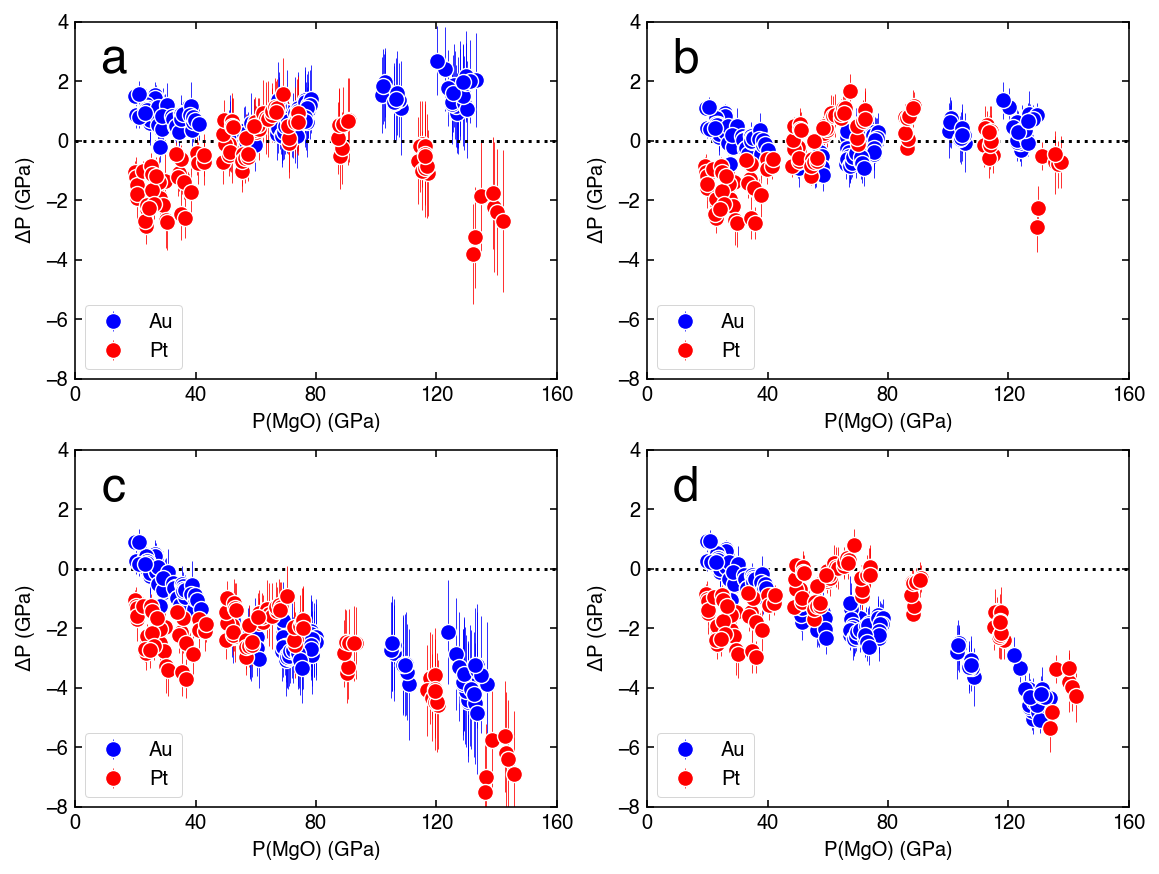

In [8]:
f, axarr = plt.subplots(2, 2, \
                    figsize=(8,6))
ax = [axarr[0,0], axarr[0,1], axarr[1,0], axarr[1,1]]
ms = 8; mew = 0.7
label = ['a', 'b', 'c', 'd']

for i in range(4):
    ax[i].axhline(y=0, c='k', ls=':')
    ax[i].errorbar(unp.nominal_values(p_MgO_AM[i]), \
            unp.nominal_values(p_Au_AM[i]) - unp.nominal_values(p_MgO_AM[i]), \
            yerr = unp.std_devs(p_Au_AM[i]), \
            fmt='bo', mec='w', mew=mew, label = 'Au', \
            ms=ms, capsize=0, lw=0.4)
    ax[i].errorbar(unp.nominal_values(p_MgO_PM[i]), \
            unp.nominal_values(p_Pt_PM[i]) - unp.nominal_values(p_MgO_PM[i]), \
            yerr = unp.std_devs(p_Pt_PM[i]), \
            fmt='ro', mec='w', mew=mew, label="Pt", \
            ms=ms, capsize=0, lw=0.4)
    ax[i].set_xlabel('P(MgO) (GPa)'); ax[i].set_ylabel('$\mathdefault{{\Delta} P}$ (GPa)')
    l = ax[i].legend(loc=3, numpoints = 1, fontsize = 10)
    l.get_frame().set_linewidth(0.5)
    plt.tight_layout(pad=0.4)
    ax[i].set_ylim(-8.,4.); ax[i].set_xlim(0.,160.)
    ax[i].set_xticks(ax[i].get_xticks()[::2])
    ax[i].text(0.08, 0.83,label[i], horizontalalignment='center',\
            verticalalignment='bottom', transform = ax[i].transAxes,\
              fontsize = 24)

plt.savefig('f-Compare-HighT.pdf', bbox_inches='tight', \
                        pad_inches=0.1)

* A 3 GPa difference at 24 GPa is clearly visible between Au and Pt throughout the comparisons.
* MgO scale is severe need for improvements in any cases.